In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# data directory
data_dir = "../Dades-Notes/"

In [13]:
df_sise = pd.read_csv(data_dir+"SisePrim.csv", low_memory=False) 
df_sise = df_sise.replace(',', '.', regex=True)

In [14]:
df_sise.describe()
df_sise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874280 entries, 0 to 874279
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ANY               874280 non-null  int64  
 1   CODI_ALUMNE       425463 non-null  float64
 2   PCAT              857551 non-null  object 
 3   PCAT_CL           857551 non-null  object 
 4   PCAT_EE           857551 non-null  object 
 5   PCAST             860625 non-null  object 
 6   PCAST_CL          860625 non-null  object 
 7   PCAST_EE          860625 non-null  object 
 8   PMAT              862473 non-null  object 
 9   PMAT_NC           862473 non-null  object 
 10  PMAT_EFM          862462 non-null  object 
 11  PMAT_CR           862473 non-null  object 
 12  PANG              798193 non-null  object 
 13  PANG_CO           798193 non-null  object 
 14  PANG_CE           798215 non-null  object 
 15  PFRAN             4257 non-null    object 
 16  PFRAN_CO          42

In [15]:
df_sise['ANY'] = df_sise['ANY'].astype(str)
df_sise['PCAT'] = df_sise['PCAT'].astype(float)
df_sise['PCAST'] = df_sise['PCAST'].astype(float)
df_sise['PANG'] = df_sise['PANG'].astype(float)
df_sise['PMAT'] = df_sise['PMAT'].astype(float)
df_sise['PMED'] = df_sise['PMED'].astype(float)

In [52]:
df_tmp2 = df_sise.groupby(['AREA_TERRITORIAL', 'ANY'])[['PCAT', 'PCAST', 'PANG', 'PMAT']].mean(numeric_only=True).reset_index()
df_tmp2

,AREA_TERRITORIAL,ANY,PCAT,PCAST,PANG,PMAT
0,Baix Llobregat,2009,76.478963,74.942310,NaN,77.537278
1,Baix Llobregat,2010,72.971164,71.025511,69.707301,77.122255
2,Baix Llobregat,2011,77.361844,74.029707,79.742625,81.259871
3,Baix Llobregat,2012,78.169688,76.159740,73.308102,79.593744
4,Baix Llobregat,2013,70.186670,73.249747,71.465191,76.051596
...,...,...,...,...,...,...
125,Vallès Occidental,2017,75.662118,74.507379,79.276126,77.426738
126,Vallès Occidental,2018,72.927635,76.963729,75.686475,78.478443
127,Vallès Occidental,2019,75.034997,75.121472,77.407812,77.620766
128,Vallès Occidental,2021,76.719000,74.113018,73.047141,76.204867


In [91]:
df_melted = df_tmp2.melt(id_vars=['AREA_TERRITORIAL', 'ANY'], var_name='Subject', value_name='Grade')
df_melted

,AREA_TERRITORIAL,ANY,Subject,Grade
0,Baix Llobregat,2009,PCAT,76.478963
1,Baix Llobregat,2010,PCAT,72.971164
2,Baix Llobregat,2011,PCAT,77.361844
3,Baix Llobregat,2012,PCAT,78.169688
4,Baix Llobregat,2013,PCAT,70.186670
...,...,...,...,...
515,Vallès Occidental,2017,PMAT,77.426738
516,Vallès Occidental,2018,PMAT,78.478443
517,Vallès Occidental,2019,PMAT,77.620766
518,Vallès Occidental,2021,PMAT,76.204867


In [117]:
df_melted['ANY'] = df_melted['ANY'].replace('2009', '09', regex=True)
anys = list(np.arange(10,23))
for i in anys:    
    year = str('20'+str(i))
    df_melted['ANY'] = df_melted['ANY'].replace(year, str(i), regex=True)

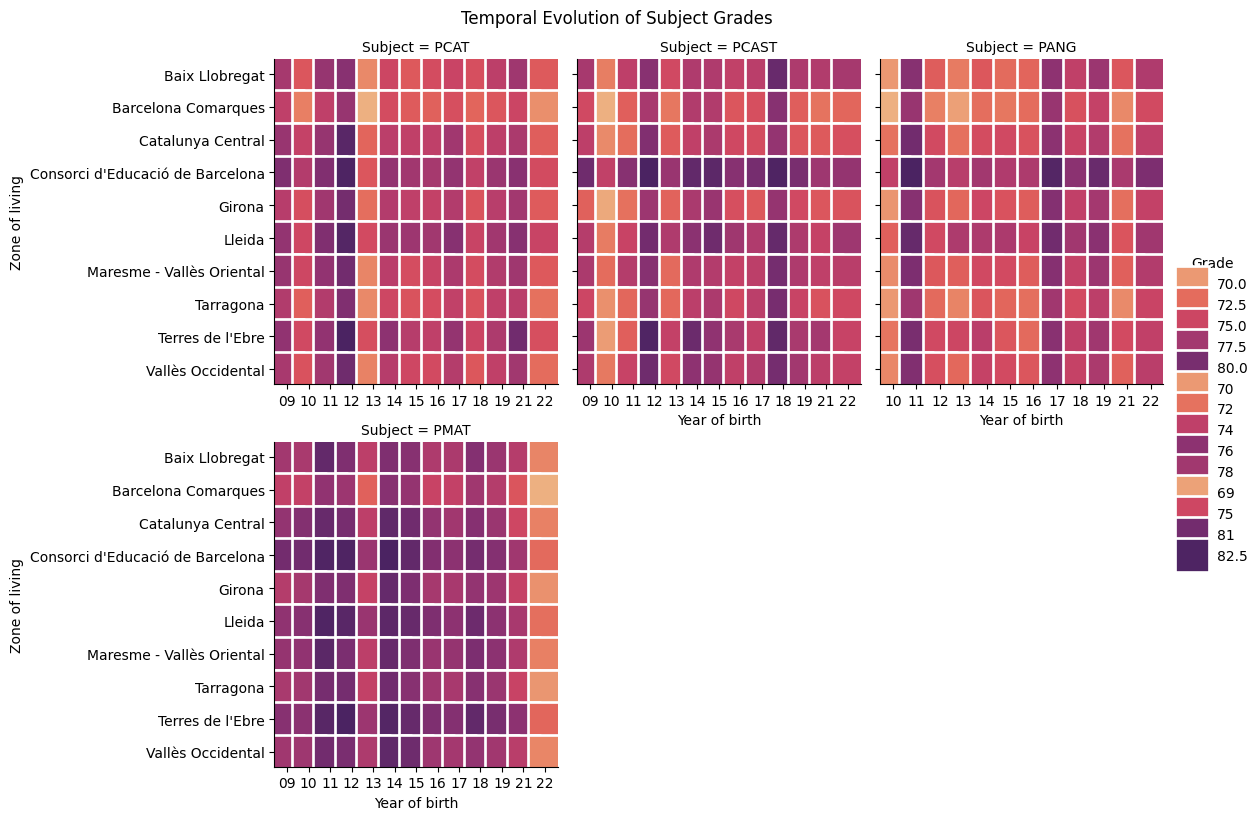

In [120]:
custom_palette = sns.color_palette(palette='flare', as_cmap=True)
g = sns.FacetGrid(df_melted, col="Subject", col_wrap=3, height=4, sharex=False)
g.map_dataframe(sns.scatterplot, x="ANY", y="AREA_TERRITORIAL", hue="Grade", palette=custom_palette, marker="s", s=590)
g.set_axis_labels("Year of birth", "Zone of living")
g.fig.suptitle("Temporal Evolution of Subject Grades", y=1.02)
g.add_legend(title="Grade")
plt.show()

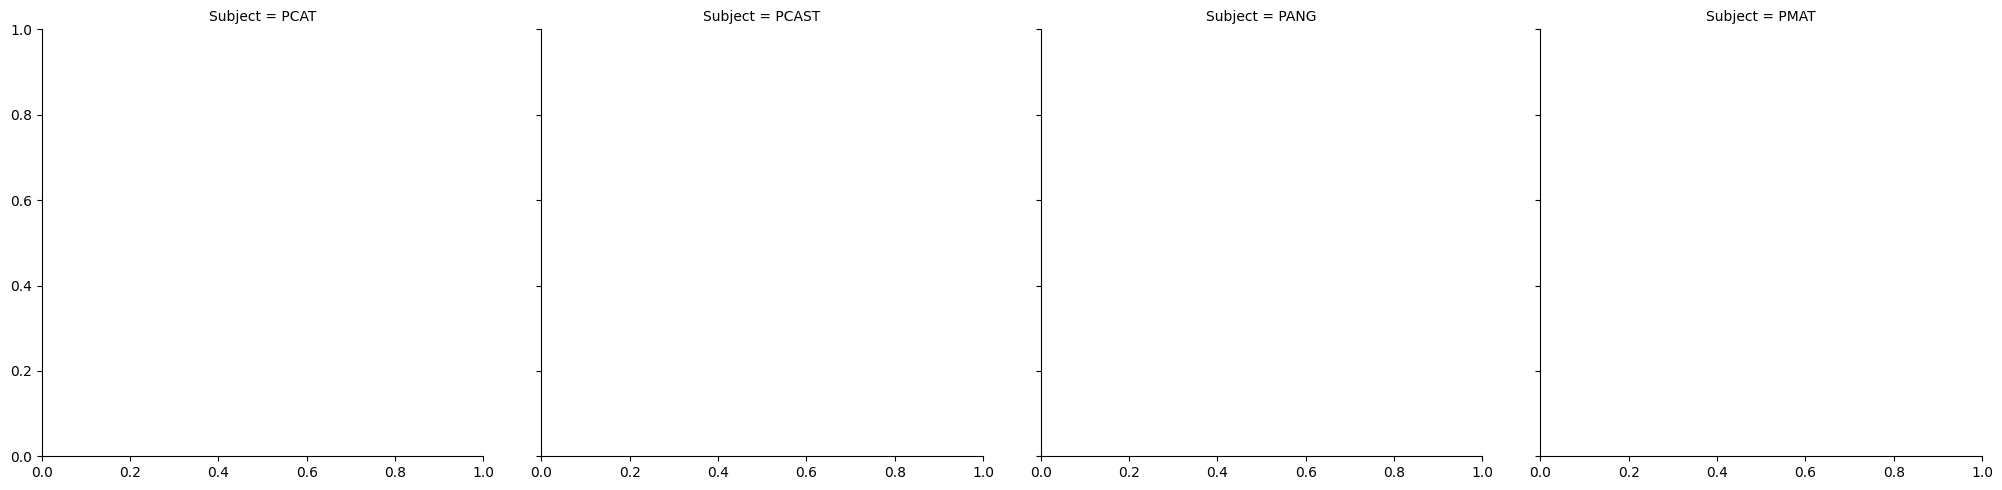

In [89]:
g = sns.FacetGrid(df_melted, col="Subject", col_wrap=8, height=5, sharex=False)

In [23]:
'''
df_siseBaix = df_tmp2[df_tmp2["AREA_TERRITORIAL"]=='Baix Llobregat']
df_siseBar = df_tmp2[df_tmp2["AREA_TERRITORIAL"]=='Barcelona Comarques']
df_siseLl = df_tmp2[df_tmp2["AREA_TERRITORIAL"]=='Lleida']
a=list(df_siseBaix.PCAST)
b=list(df_siseBar.PCAST)
c=list(df_siseLl.PCAST)
'''

'\ndf_siseBaix = df_tmp2[df_tmp2["AREA_TERRITORIAL"]==\'Baix Llobregat\']\ndf_siseBar = df_tmp2[df_tmp2["AREA_TERRITORIAL"]==\'Barcelona Comarques\']\ndf_siseLl = df_tmp2[df_tmp2["AREA_TERRITORIAL"]==\'Lleida\']\na=list(df_siseBaix.PCAST)\nb=list(df_siseBar.PCAST)\nc=list(df_siseLl.PCAST)\n'

In [24]:
'''
plt.plot(a)
plt.plot(b)
plt.plot(c)
'''

'\nplt.plot(a)\nplt.plot(b)\nplt.plot(c)\n'

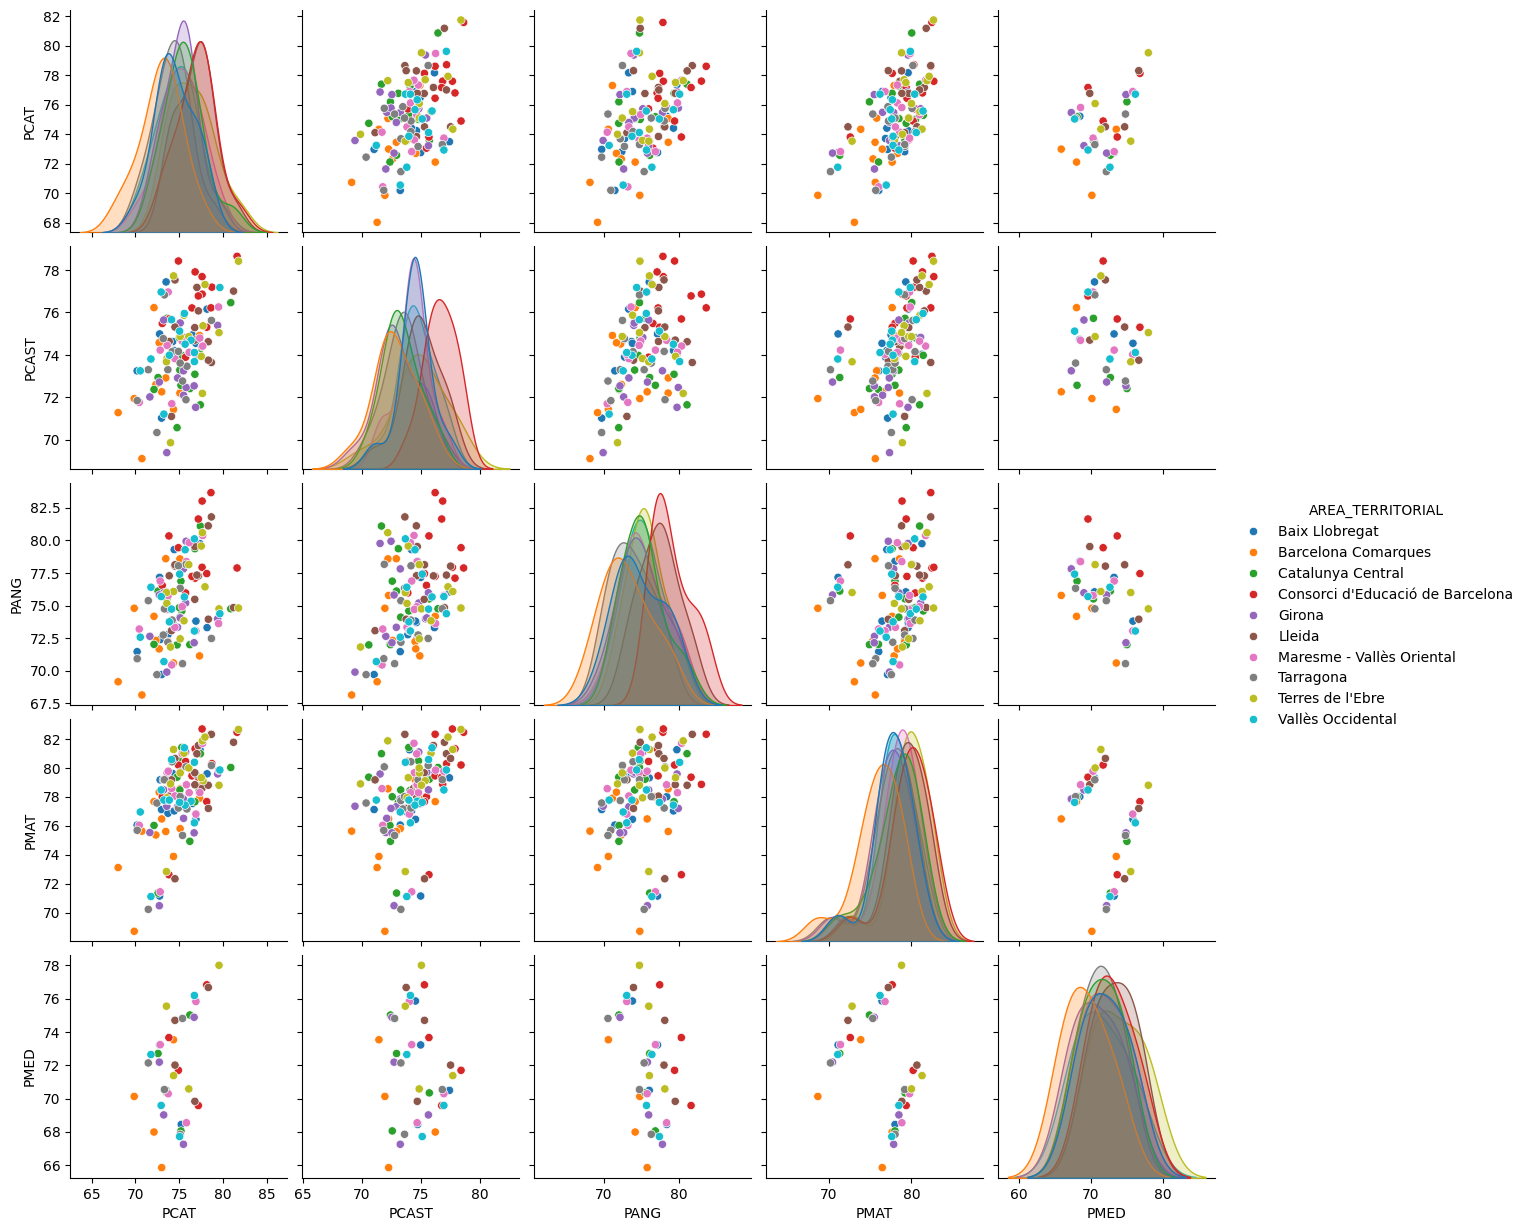

In [24]:
filtre = ['PCAT', 'PCAST','AREA_TERRITORIAL', 'PANG', 'PMAT', 'PMED']
sns.pairplot(df_tmp2[filtre], hue='AREA_TERRITORIAL')